In [99]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# import torch
# from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit



In [100]:
train_data = pd.read_csv('D:\\DeepLearning\\DeepLearning\\train.csv')
#test_df = pd.read_csv('D:\\DeepLearning\\DeepLearning\\test.csv')

In [101]:

display(train_data)


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [102]:
#display(test_df)

In [103]:
train_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 193 entries, id to texture64
dtypes: float64(191), int64(1), object(1)
memory usage: 1.5+ MB


In [105]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [106]:
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [107]:
train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values


C:\Users\Shaima\AppData\Local\Temp\ipykernel_8680\3242413476.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


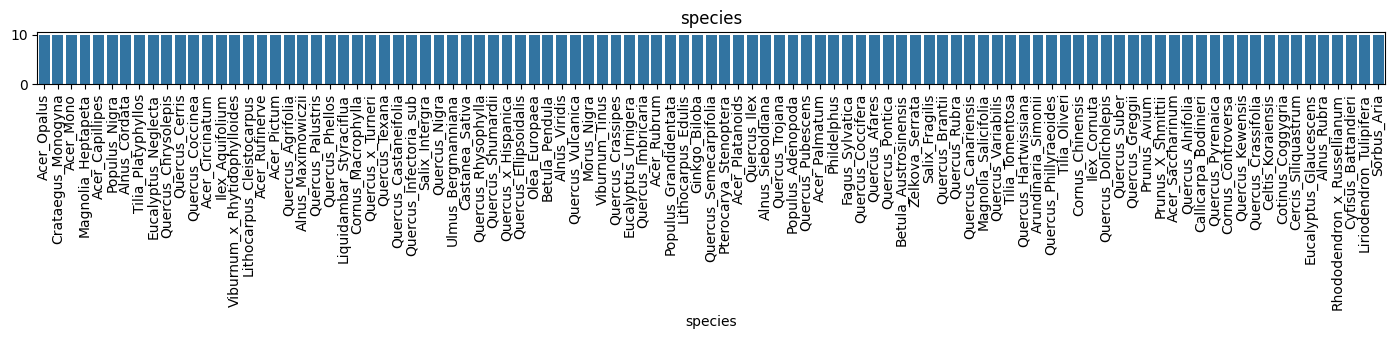

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(80, 20))

columns = 4
i = 0

for col in train_data.select_dtypes('object'):
    value_counts = train_data[col].value_counts()
    num_values = len(value_counts)
    plt.subplot(int(num_values / columns + 1), columns, i + 1)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

C:\Users\Shaima\AppData\Local\Temp\ipykernel_8680\2165997257.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


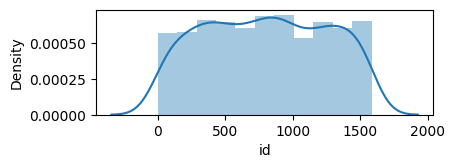

In [135]:
plt.figure(figsize = (20, 80))

columns = 4
i = 0

for col in train_data.select_dtypes('int'):
    plt.subplot(int(train_data.shape[1] / columns + 1), columns, i + 1)
    sns.distplot(train_data[col])
    i += 1

C:\Users\Shaima\AppData\Local\Temp\ipykernel_8680\676327239.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])
C:\Users\Shaima\AppData\Local\Temp\ipykernel_8680\676327239.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])
C:\Users\Shaima\AppData\Local\Temp\ipy

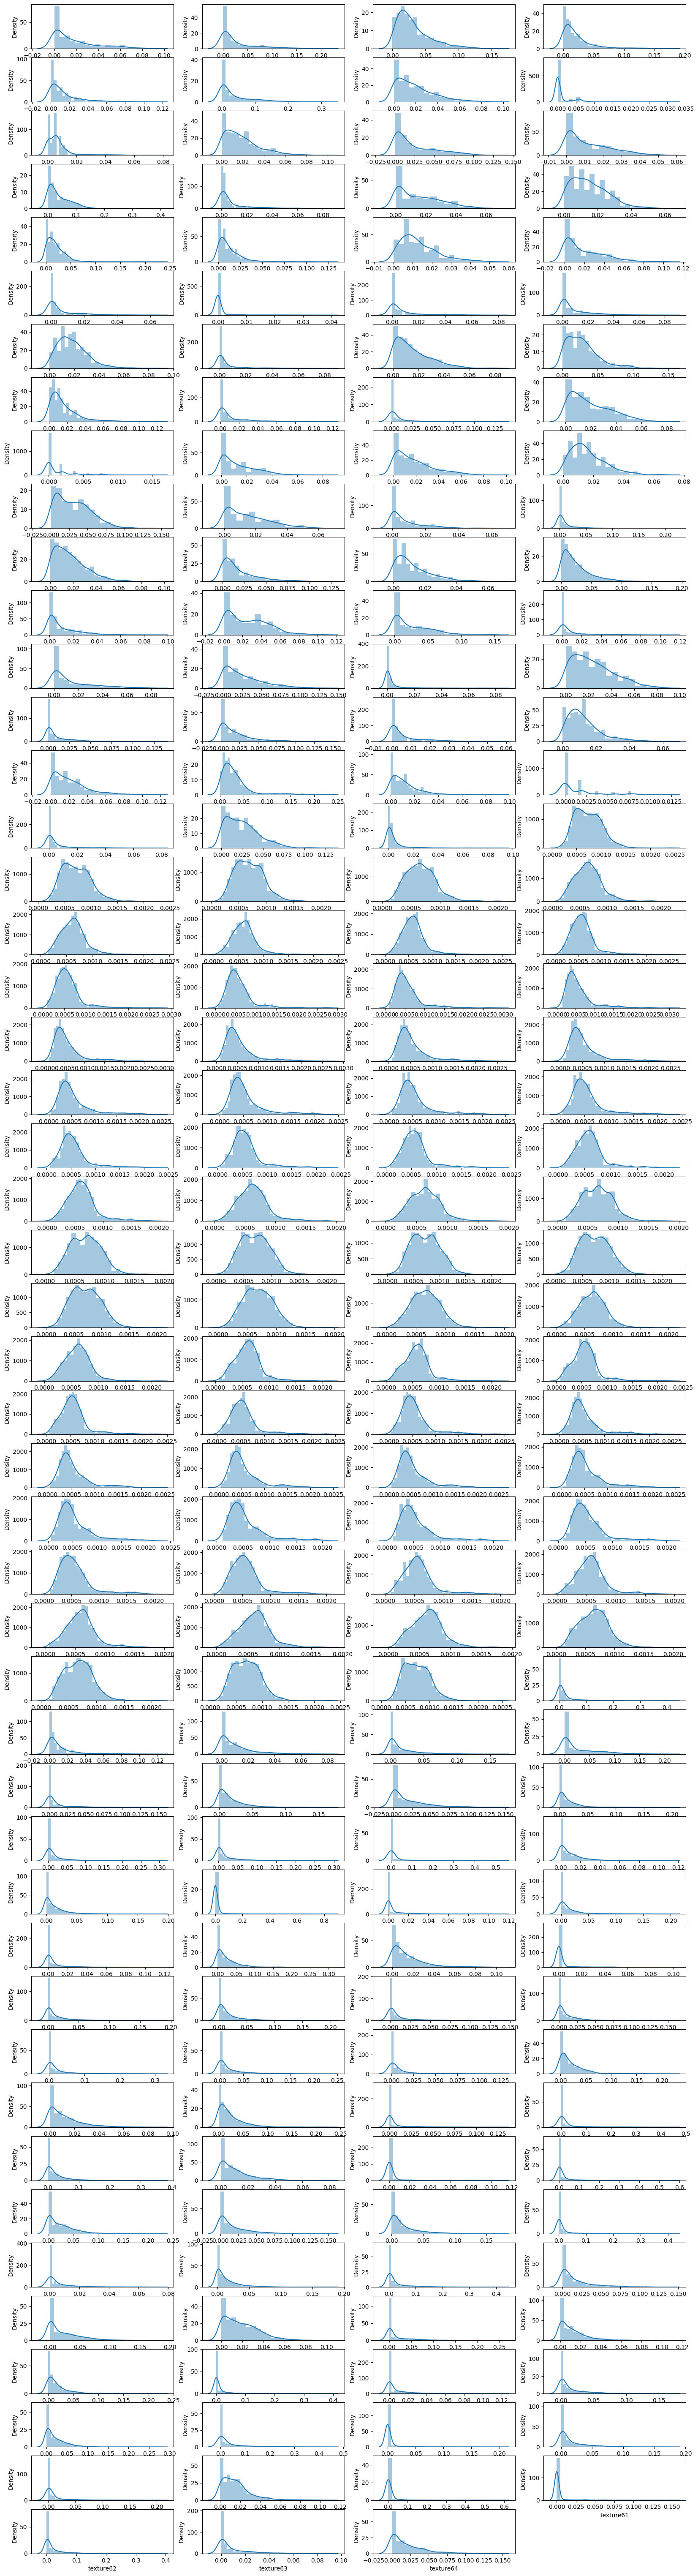

In [136]:
plt.figure(figsize = (20, 80))

columns = 4
i = 0

for col in train_data.select_dtypes('float'):
    plt.subplot(int(train_data.shape[1] / columns + 1), columns, i + 1)
    sns.distplot(train_data[col])
    i += 1

In [109]:
label_encoder = LabelEncoder().fit(train_data.species) #label encoding to the species 
labels = label_encoder.transform(train_data.species)
classes = list(label_encoder.classes_)
#print(labels)
train_data['species']=labels 
print(train_data['species'])

0       3
1      49
2      65
3      94
4      84
       ..
985    40
986     5
987    11
988    78
989    50
Name: species, Length: 990, dtype: int32


In [110]:
print("Duplicated data:", train_data.duplicated().sum())

Duplicated data: 0


In [111]:
#see correlation matrix between featues
#1. drop species column and id 

train_data_drop_output = train_data.drop(['species','id'],axis=1)

correlationMatrix = train_data_drop_output.corr()

print(correlationMatrix)

correlationMatrix.to_csv('visualize Correlation Matrix',index=True)

            margin1   margin2   margin3   margin4   margin5   margin6  \
margin1    1.000000  0.806390 -0.182829 -0.297807 -0.475874  0.767718   
margin2    0.806390  1.000000 -0.204640 -0.315953 -0.444312  0.825762   
margin3   -0.182829 -0.204640  1.000000  0.120042 -0.185007 -0.163976   
margin4   -0.297807 -0.315953  0.120042  1.000000  0.029480 -0.261437   
margin5   -0.475874 -0.444312 -0.185007  0.029480  1.000000 -0.438587   
...             ...       ...       ...       ...       ...       ...   
texture60  0.035072  0.081069 -0.019850 -0.052317  0.006542  0.066262   
texture61 -0.007581 -0.007057  0.084957  0.320644 -0.109229 -0.050498   
texture62 -0.033159 -0.037405 -0.081999 -0.073886  0.151675 -0.031555   
texture63 -0.075171 -0.098957 -0.148193  0.050970  0.022299 -0.132087   
texture64  0.030414 -0.029532  0.061780  0.014343 -0.148834 -0.003164   

            margin7   margin8   margin9  margin10  ...  texture55  texture56  \
margin1    0.066273 -0.094137 -0.181496  0.

In [112]:
#train_data = train_data.drop(['species'],axis=1)
df = pd.DataFrame(data=train_data, columns=['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9','margin10','margin11','margin12','margin13','margin14','margin15','margin16','margin17','margin18','margin19','margin20','margin21','margin22','margin23','margin24','margin25','margin26'])
print(df)


      margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0    0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1    0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   
2    0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359   
3    0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438   
4    0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859   
..        ...       ...       ...       ...       ...       ...       ...   
985  0.060547  0.119140  0.007812  0.003906  0.000000  0.148440  0.017578   
986  0.001953  0.003906  0.021484  0.107420  0.001953  0.000000  0.000000   
987  0.001953  0.003906  0.000000  0.021484  0.078125  0.003906  0.007812   
988  0.000000  0.000000  0.046875  0.056641  0.009766  0.000000  0.000000   
989  0.023438  0.019531  0.031250  0.015625  0.005859  0.019531  0.035156   

     margin8   margin9  margin10  ...  margin17  margin18  margin19  margin

margin 2

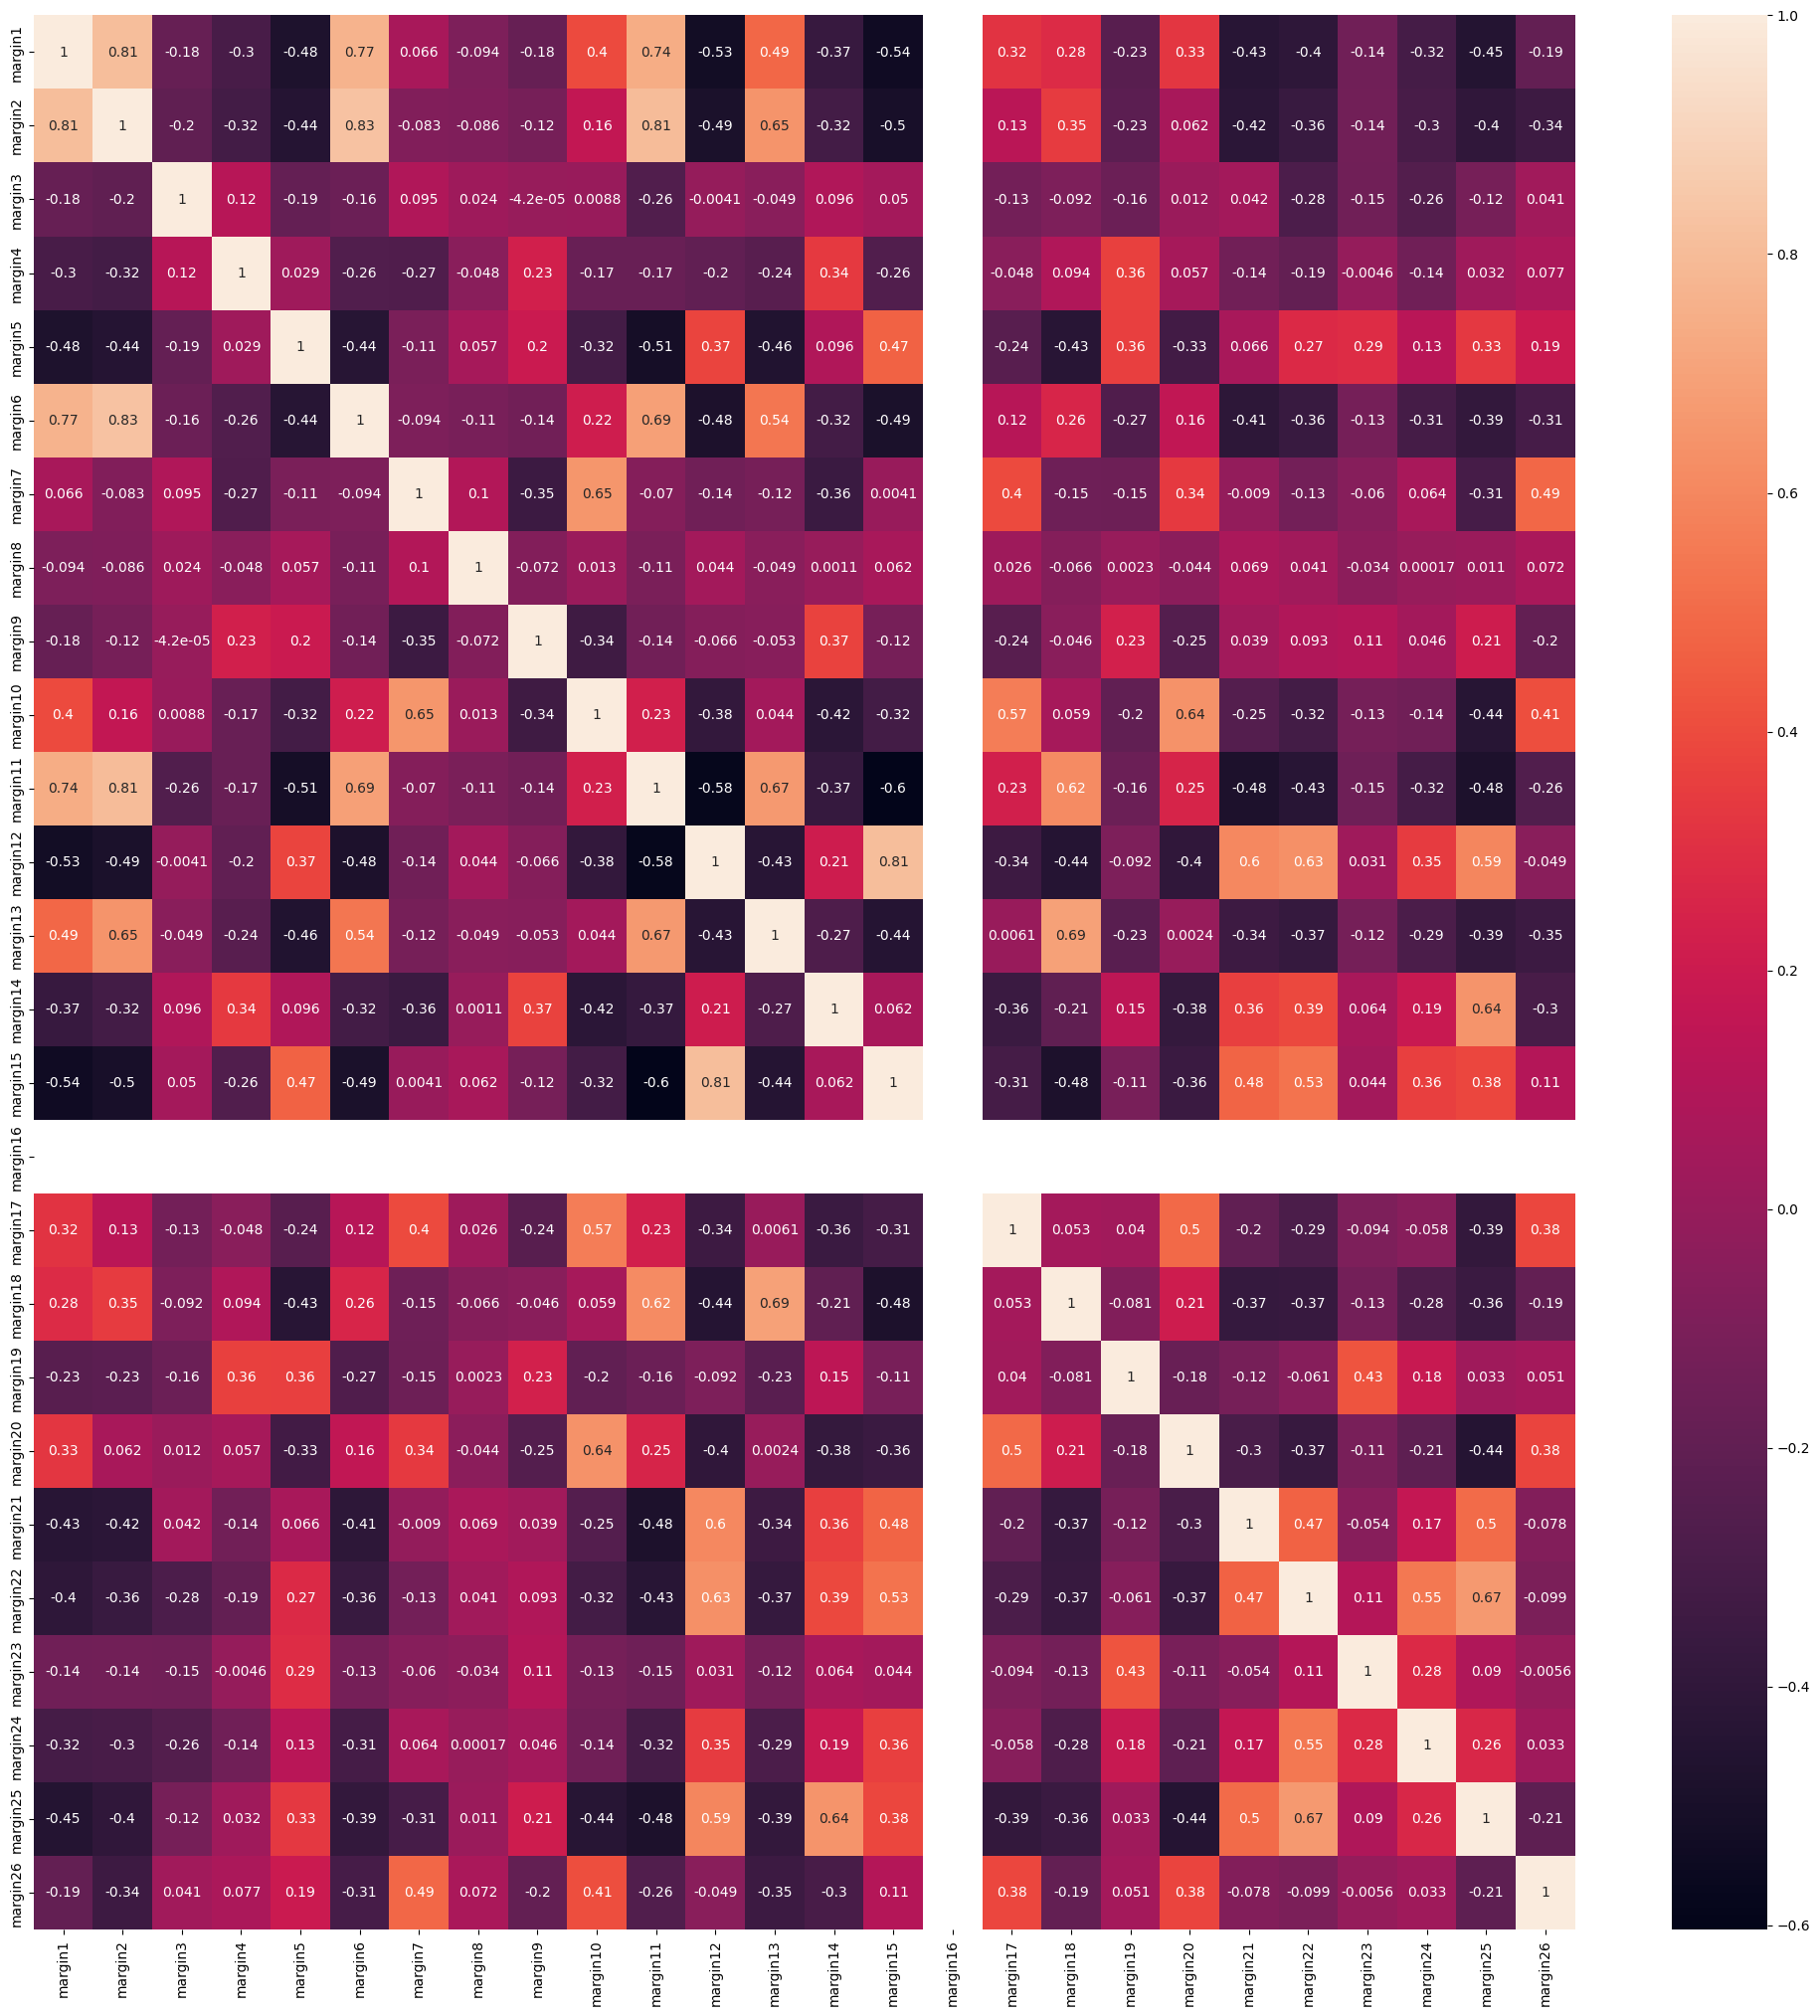

In [113]:
matrix = df.corr()[['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9','margin10','margin11','margin12','margin13','margin14','margin15','margin16','margin17','margin18','margin19','margin20','margin21','margin22','margin23','margin24','margin25','margin26']]
fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(matrix, annot=True,ax=ax)
plt.show()

In [114]:
X = train_data.drop(['species','id'],axis=1)
y = train_data['species']

In [115]:
scaler = StandardScaler().fit(X)
scaled_train = scaler.transform(X)
print(scaled_train)

[[-0.48661074 -0.13135701 -0.33095592 ... -0.39487147 -0.65214311
   0.26239707]
 [-0.58560191 -0.73488047 -0.02856115 ... -0.49497401  2.18166976
   0.13364087]
 [-0.58560191 -0.48340807 -0.48219201 ... -0.52001246  0.83564129
  -0.72463124]
 ...
 [-0.78358426 -0.63430181 -1.23821765 ...  0.1807566  -0.65214311
  -0.76756462]
 [-0.88257543 -0.73488047  0.5762671  ... -0.52001246 -0.51045972
  -0.72463124]
 [ 0.30542003 -0.23196142 -0.02856115 ...  0.08065405  1.18988604
   0.13364087]]


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Part Two Leaf Classficatin Using CNN

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [118]:
images_dir='D:\\DeepLearning\\DeepLearning\\images'
train_data = pd.read_csv('D:\\DeepLearning\\DeepLearning\\train.csv')
#test_df = pd.read_csv('D:\\DeepLearning\\DeepLearning\\test.csv')

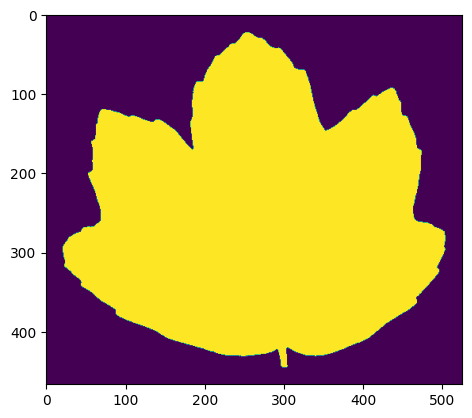

In [119]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image 
image_path = 'D:\\DeepLearning\\DeepLearning\\images\\1.jpg' 
testImage = img.imread(image_path) 
# displaying the image 
plt.imshow(testImage)

In [120]:
import os
# List all image files in the directory
image_files = os.listdir(images_dir)
print(image_files)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1013.jpg', '1014.jpg', '1016.jpg', '1017.jpg', '1019.jpg', '1021.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1027.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1034.jpg', '1036.jpg', '1037.jpg', '1039.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1046.jpg', '1048.jpg', '1049.jpg', '1051.jpg', '1052.jpg', '1056.jpg', '1059.jpg', '106.jpg', '1061.jpg', '1062.jpg', '1065.jpg', '1066.jpg', '107.jpg', '1072.jpg', '1073.jpg', '1076.jpg', '1077.jpg', '108.jpg', '1080.jpg', '1081.jpg', '1083.jpg', '1085.jpg', '1087.jpg', '1088.jpg', '1089.jpg', '109.jpg', '1090.jpg', '1093.jpg', '1094.jpg', '1095.jpg', '1096.jpg', '1097.jpg', '1098.jpg', '11.jpg', '1100.jpg', '1101.jpg', '1110.jpg', '1112.jpg', '1113.jpg', '1117.jpg', '1118.jpg', '1119.jpg', '1120.jpg', '1121.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1128.jpg', '1130.jpg', '1131

In [121]:
%cd 'D:\\DeepLearning\\DeepLearning\\images'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'D:\\\\DeepLearning\\\\DeepLearning\\\\images'"
d:\DeepLearning\DeepLearning


C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [122]:
# Create a dictionary mapping IDs to species
id_to_species = dict(zip(train_data['id'], train_data['species']))

# Extract IDs from image filenames (adjust the extraction logic based on your filenames)
image_ids = [filename.split('.jpg')[0] for filename in image_files]  # Example: splitting by '_' to get IDs

# Match image IDs to their corresponding species labels
image_id_to_species = {image_id: id_to_species.get(int(image_id), 'Unknown') for image_id in image_ids if image_id.isdigit()}

print(type(image_id_to_species))
# if image_id_to_species


<class 'dict'>


In [123]:
unknown_image_ids = [image_id for image_id, species in image_id_to_species.items() if species == 'Unknown']

# Print the image IDs classified as "Unknown"
print("Image IDs classified as 'Unknown':", unknown_image_ids)

# Remove the "Unknown" images from the image_id_to_species dictionary
for image_id in unknown_image_ids:
    del image_id_to_species[image_id]

# Verify the removal by printing the updated dictionary
print("Updated image_id_to_species dictionary:")
print(image_id_to_species)

Image IDs classified as 'Unknown': []
Updated image_id_to_species dictionary:
{'1': 'Acer_Opalus', '10': 'Quercus_Canariensis', '100': 'Celtis_Koraiensis', '1000': 'Acer_Circinatum', '1001': 'Populus_Grandidentata', '1002': 'Acer_Opalus', '1003': 'Acer_Saccharinum', '1004': 'Alnus_Sieboldiana', '1005': 'Acer_Mono', '1006': 'Quercus_Ilex', '1007': 'Quercus_Coccinea', '101': 'Quercus_Dolicholepis', '1010': 'Quercus_Semecarpifolia', '1011': 'Acer_Platanoids', '1013': 'Betula_Pendula', '1014': 'Phildelphus', '1016': 'Quercus_Trojana', '1017': 'Crataegus_Monogyna', '1019': 'Acer_Circinatum', '1021': 'Alnus_Rubra', '1023': 'Pterocarya_Stenoptera', '1024': 'Quercus_Palustris', '1025': 'Salix_Fragilis', '1027': 'Quercus_Coccifera', '103': 'Rhododendron_x_Russellianum', '1030': 'Tilia_Platyphyllos', '1031': 'Magnolia_Heptapeta', '1032': 'Olea_Europaea', '1034': 'Arundinaria_Simonii', '1036': 'Lithocarpus_Edulis', '1037': 'Quercus_Castaneifolia', '1039': 'Arundinaria_Simonii', '1040': 'Tilia_Pla

In [124]:
# Get image filenames corresponding to unknown_image_ids
unknown_image_files = [filename for filename in image_files if filename.split('.jpg')[0] in unknown_image_ids]

# Print the image filenames classified as "Unknown"
print("Image filenames classified as 'Unknown':", unknown_image_files)

Image filenames classified as 'Unknown': []


In [125]:
print(image_id_to_species.keys())

dict_keys(['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '101', '1010', '1011', '1013', '1014', '1016', '1017', '1019', '1021', '1023', '1024', '1025', '1027', '103', '1030', '1031', '1032', '1034', '1036', '1037', '1039', '1040', '1041', '1042', '1046', '1048', '1049', '1051', '1052', '1056', '1059', '106', '1061', '1062', '1065', '1066', '107', '1072', '1073', '1076', '1077', '108', '1080', '1081', '1083', '1085', '1087', '1088', '1089', '109', '1090', '1093', '1094', '1095', '1096', '1097', '1098', '11', '1100', '1101', '1110', '1112', '1113', '1117', '1118', '1119', '1120', '1121', '1123', '1124', '1125', '1128', '1130', '1131', '1132', '1134', '1135', '1136', '1142', '1144', '1145', '1147', '1148', '115', '1152', '1153', '1154', '1156', '1157', '1159', '116', '1160', '1163', '1165', '1166', '1167', '1168', '1169', '1170', '1171', '1172', '1173', '1174', '1175', '1176', '1179', '118', '1180', '1182', '1184', '1186', '1187', '1194', '1196', '1197'

In [126]:
# Loop through unknown_image_files and delete corresponding image files
for filename in unknown_image_files:
    file_path = os.path.join(images_dir, filename)
    if os.path.exists(file_path):  # Check if the file exists
        os.remove(file_path)  # Remove the file

In [127]:
# ImageDataGenerator for data augmentation and preprocessing
# train_datagenerator = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

In [128]:
# test_datagenerator = ImageDataGenerator(rescale=1./255)


In [129]:
def resize_img(img, max_dim=96):
    """
    Resize the image to so the maximum side is of size max_dim
    Returns a new image of the right size
    """
    # Get the axis with the larger dimension
    max_ax = max((0, 1), key=lambda i: img.size[i])
    # Scale both axes so the image's largest dimension is max_dim
    scale = max_dim / float(img.size[max_ax])
    return img.resize((int(img.size[0] * scale), int(img.size[1] * scale)))

In [130]:
from PIL import Image
import os
# Define the directory where resized images will be saved
resized_directory = 'path_to_resized_images_folder'  # Replace with your resized images folder

# Create the resized images directory if it doesn't exist
os.makedirs(resized_directory, exist_ok=True)

# Loop through all files in the images directory
for filename in os.listdir(images_dir):
    # Check if the file is an image (you can add additional image file extensions if needed)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(images_dir, filename))
        
        # Resize the image using the resize_img function
        resized_img = resize_img(img, max_dim=96)
        
        # Save the resized image to the resized images directory
        resized_img.save(os.path.join(resized_directory, filename))

In [131]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # List all image files in the directory
# # images_dir = "F:\\Fall 2023\\DL project\\DeepLearning_zip\\DeepLearning\\images"

# # List all image files in the directory
# # image_files = os.listdir(images_dir)

# image_resize_dir = "D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder"
# image_files_resize = os.listdir(image_resize_dir)
# # Split the image files into train and test sets
# train_files, test_files = train_test_split(image_files_resize, train_size=0.8, random_state=42)

# # Create directories for train and test sets
# train_directory = "D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\train"
# test_directory = "D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\test"

# os.makedirs(train_directory, exist_ok=True)
# os.makedirs(test_directory, exist_ok=True)

# # Move images to train directory
# for file in train_files:
#     src = os.path.join(image_resize_dir, file)
#     dst = os.path.join(train_directory, file)
#     shutil.copy(src, dst)
# # Move images to test directory
# for file in test_files:
#     src = os.path.join(image_resize_dir, file)
#     dst = os.path.join(test_directory, file)
#     shutil.copy(src, dst)

In [132]:
display(train_data["species"].unique())
 

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [133]:
def get_label_from_filename(filename):
    # Assuming the label is separated by underscores and the label is the first part
    label = [filename.split('.jpg')[0] for filename in image_files] # Modify this logic according to your filename pattern
    return label

In [134]:
import os
import shutil
from sklearn.model_selection import StratifiedShuffleSplit

# Set your image directory
image_directory = "D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder"

image_files = os.listdir(image_directory)

# Assuming each image has a label/index
# Here, let's say you have a dictionary or a DataFrame where each image file has a corresponding label
# image_labels = {image_filename: label}
# Or you may load a DataFrame with image filenames and labels

# Create directories for train and test sets
train_directory = "train"
test_directory = "test"

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Splitting into train and test indices using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the image file
image_filenames = os.listdir(image_directory)
labels = [get_label_from_filename(filename) for filename in image_filenames]  # Implement get_label_from_filename function

for train_index, test_index in splitter.split(image_filenames, labels):
    train_files = [image_filenames[idx] for idx in train_index]
    test_files = [image_filenames[idx] for idx in test_index]


# Move images to train directory
for file in train_files:
    src = os.path.join(image_directory, file)
    dst = os.path.join(train_directory, file)
    shutil.copy(src, dst)
    
# Move images to test directory
for file in test_files:
    src = os.path.join(image_directory, file)
    dst = os.path.join(test_directory, file)
    shutil.copy(src, dst)


PermissionError: [Errno 13] Permission denied: 'D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\train'

In [ ]:
import os
# Specify the paths
test_path = r"D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\test"
train_path = r"D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\train"

# List all files in the test and train paths
test_files = set(os.listdir(test_path))
train_files = set(os.listdir(train_path))

# Find common files
common_files = test_files.intersection(train_files)

# Print or use the list of common files
print("Common Files:", common_files)
print(len(common_files))

Common Files: set()
0


In [ ]:
# #Remove common files from the train path
# for file in common_files:
#    file_path = os.path.join(train_path, file)
#    os.remove(file_path)
#    print(f"Removed: {file_path}")

# start defining the model of the CNN

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

def combined_model():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model



# convert the train images into numpy array format

In [ ]:
import os
import numpy as np
from PIL import Image

# Path to the directory containing resized images
imagen_train='D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\train'
# List all image filenames in the directory
image_files = os.listdir(imagen_train)

# Assuming all images have the same shape (width, height, channels)
image_shape = (96, 96, 1)  # Adjust dimensions as per your images

# Initialize an empty numpy array to store images
num_images = len(image_files)
X_train_resized = np.empty((num_images, *image_shape), dtype=np.uint8)

# Loop through each image, read, and preprocess it
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(imagen_train, image_file)
    img = Image.open(image_path)
    img = img.resize((image_shape[1], image_shape[0]))  # Resize if necessary
    img_array = np.array(img)
    # If the images are grayscale, convert to 3 channels (if needed)
    if img_array.ndim == 2:
        img_array = np.expand_dims(img_array, axis=-1)
        img_array = np.repeat(img_array, 1, axis=-1)
    X_train_resized[idx] = img_array

In [ ]:

# Extract IDs from image filenames (adjust the extraction logic based on your filenames)
image_ids = [filename.split('.jpg')[0] for filename in image_files]  # Example: splitting by '_' to get IDs
# Check the length of X_train_resized and image_ids
print("X_train_resized length:", len(X_train_resized))
print("image_ids length:", len(image_ids))

X_train_resized length: 792
image_ids length: 792


In [ ]:

# Filter the resized images and labels based on the available species information
filtered_ids = list(image_id_to_species.keys())  # Get the IDs of known species

print(filtered_ids)

# Filter the image_ids to only include those present in X_train_resized
# filtered_image_ids = [image_id for image_id in image_ids if int(image_id) in filtered_ids]

#print(filtered_image_ids)

print('Creating the model...')
model = combined_model()
print('Model created!')

filtered_indices = [image_ids.index(str(image_id)) for image_id in filtered_ids if str(image_id) in image_ids]
X_filtered_resized = X_train_resized[filtered_indices]

# Filter the resized images and labels based on available species information
# X_filtered_resized = X_train_resized[[int(image_id) for image_id in image_ids]]
y_filtered_labels = [image_id_to_species[image_id] for image_id in image_ids]

# Convert the labels to categorical format if needed (for example, one-hot encoding)
# Example using pandas get_dummies:
import pandas as pd
y_categorical = pd.get_dummies(y_filtered_labels)
print("Length of filtered images:", len(X_filtered_resized))
print("Length of filtered labels:", len(y_categorical))

# Now, you can fit the filtered images and labels into your CNN model
history = model.fit(
    X_filtered_resized,
    y_categorical,  # Use the categorical labels
    epochs=100,
    validation_split=0.1,
    verbose=1
)

['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '101', '1010', '1011', '1013', '1014', '1016', '1017', '1019', '1021', '1023', '1024', '1025', '1027', '103', '1030', '1031', '1032', '1034', '1036', '1037', '1039', '1040', '1041', '1042', '1046', '1048', '1049', '1051', '1052', '1056', '1059', '106', '1061', '1062', '1065', '1066', '107', '1072', '1073', '1076', '1077', '108', '1080', '1081', '1083', '1085', '1087', '1088', '1089', '109', '1090', '1093', '1094', '1095', '1096', '1097', '1098', '11', '1100', '1101', '1110', '1112', '1113', '1117', '1118', '1119', '1120', '1121', '1123', '1124', '1125', '1128', '1130', '1131', '1132', '1134', '1135', '1136', '1142', '1144', '1145', '1147', '1148', '115', '1152', '1153', '1154', '1156', '1157', '1159', '116', '1160', '1163', '1165', '1166', '1167', '1168', '1169', '1170', '1171', '1172', '1173', '1174', '1175', '1176', '1179', '118', '1180', '1182', '1184', '1186', '1187', '1194', '1196', '1197', '1198', 

In [ ]:
print(y_categorical.shape)

(792, 99)


# adjusting the test data format

In [ ]:
import os
import numpy as np
from PIL import Image

# Path to the directory containing resized images
imagen_test='D:\\DeepLearning\\DeepLearning\\path_to_resized_images_folder\\test'
# List all image filenames in the directory
image_files = os.listdir(imagen_test)

# Assuming all images have the same shape (width, height, channels)
image_shape = (96, 96, 1)  # Adjust dimensions as per your images

# Initialize an empty numpy array to store images
num_images = len(image_files)
X_test_resized = np.empty((num_images, *image_shape), dtype=np.uint8)

# Loop through each image, read, and preprocess it
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(imagen_test, image_file)
    img = Image.open(image_path)
    img = img.resize((image_shape[1], image_shape[0]))  # Resize if necessary
    img_array = np.array(img)
    # If the images are grayscale, convert to 3 channels (if needed)
    if img_array.ndim == 2:
        img_array = np.expand_dims(img_array, axis=-1)
        img_array = np.repeat(img_array, 1, axis=-1)
    X_test_resized[idx] = img_array

In [ ]:
print(X_test_resized.shape)

(198, 96, 96, 1)


In [ ]:
# Extract IDs from image filenames (adjust the extraction logic based on your filenames)
image_ids = [filename.split('.jpg')[0] for filename in image_files]  
# Check the length of X_test_resized and image_ids
print("X_test_resized length:", len(X_test_resized))
print("image_ids length:", len(image_ids))

X_train_resized length: 198
image_ids length: 198


In [ ]:
filtered_ids = list(image_id_to_species.keys())

filtered_indices = [image_ids.index(str(image_id)) for image_id in filtered_ids if str(image_id) in image_ids]

X_test_filtered_resized = X_test_resized[filtered_indices]

# Filter the labels based on available species information using the same indices
y_test_filtered_labels = [image_id_to_species[image_id] for image_id in image_ids]

# Ensure the lengths are consistent after filtering
print("Length of filtered images:", len(X_test_filtered_resized))
print("Length of filtered labels:", len(y_test_filtered_labels))

# Now, create categorical labels without potential missing values
# Example using pandas get_dummies:
y_test_categorical = pd.get_dummies(y_test_filtered_labels)
print("Length of categorical labels:", len(y_test_categorical))

Length of filtered images: 198
Length of filtered labels: 198
Length of categorical labels: 198


In [ ]:
print((y_test_categorical))

     Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  Acer_Palmatum  \
0              False            False      False        False          False   
1              False            False      False        False          False   
2              False            False      False        False          False   
3              False            False      False        False          False   
4              False            False      False        False          False   
..               ...              ...        ...          ...            ...   
193            False            False      False        False           True   
194            False            False      False        False          False   
195            False            False      False        False          False   
196            False            False      False        False          False   
197            False            False      False        False          False   

     Acer_Pictum  Acer_Platanoids  Acer

In [ ]:
print(y_test_categorical.shape)

(198, 84)


In [ ]:
print(len(X_test_filtered_resized))

198


In [ ]:
print((y_test_filtered_labels))

In [ ]:
predictions = model.predict(X_test_filtered_resized)
#loss, accuracy = model.evaluate(predictions, y_test_categorical)
print(f"Test accuracy: {predictions.shape}")
print(y_test_categorical.shape)


7/7 [==============================] - 0s 6ms/step
Test accuracy: (198, 99)
(198, 84)


In [ ]:
import pandas as pd
import numpy as np

# Create DataFrame from predictions and y_test_categorical
predictions_df = pd.DataFrame(predictions)

# Identify missing categories in predictions
missing_categories = y_test_categorical.columns.difference(predictions_df.columns)

# Add missing categories with zero columns to predictions_df
for category in missing_categories:
    predictions_df[category] = 0

# Reorder columns to match y_test_categorical
predictions_df = predictions_df[y_test_categorical.columns]

# Ensure the shapes of predictions and y_test_categorical are aligned
print(predictions_df.shape)
print(y_test_categorical.shape)



(198, 84)
(198, 84)


In [ ]:
from sklearn.metrics import classification_report

# Create DataFrame from predictions and y_test_categorical
predictions_df = pd.DataFrame(predictions)

# Identify missing categories in predictions
missing_categories = y_test_categorical.columns.difference(predictions_df.columns)

# Add missing categories with zero columns to predictions_df
for category in missing_categories:
    predictions_df[category] = 0

# Reorder columns to match y_test_categorical
predictions_df = predictions_df[y_test_categorical.columns]

# Get the true classes and predicted classes
true_classes = np.argmax(y_test_categorical.values, axis=1)
predicted_classes = np.argmax(predictions_df.values, axis=1)

# Generate the classification report
classification_rep = classification_report(true_classes, predicted_classes)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.02         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
    

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.13636363636363635


In [ ]:
reshaped_predictions = predictions[:len(y_test_categorical)]

# Now, you should be able to evaluate the model using these reshaped predictions
# For instance, you could calculate accuracy as follows:
from sklearn.metrics import accuracy_score

# Assuming y_test_categorical is one-hot encoded, get the class predictions (argmax)
predicted_classes = np.argmax(reshaped_predictions, axis=1)
true_classes = np.argmax(y_test_categorical, axis=1)

y_test_categorical_trimmed = y_test_categorical[:len(reshaped_predictions)]

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_categorical_trimmed, axis=1), np.argmax(reshaped_predictions, axis=1))
print(f"Accuracy: {accuracy}")

Accuracy: 0.13636363636363635


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# # Calculate precision, recall, and F1-score
# precision = precision_score(np.argmax(y_test_categorical_trimmed, axis=1), np.argmax(reshaped_predictions, axis=1), average='weighted')
# recall = recall_score(y_true, y_pred_labels, average='weighted')
# f1 = f1_score(y_true, y_pred_labels, average='weighted')

# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-score: {f1}")

# # Generate a classification report
# classification_rep = classification_report(y_true, y_pred_labels)
# print("Classification Report:")
# print(classification_rep)

# # Generate a confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred_labels)
# print("Confusion Matrix:")
# print(conf_matrix)

Precision: 0.007575757575757576
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00   

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Undefine

In [ ]:
import numpy as np
y_pred_labels = np.argmax(predictions, axis=1) 
# unique_y_pred = np.unique(y_pred_labels)
# print(unique_y_pred.shape)

In [ ]:

# y_true_unique = train_data['species'].unique()
# print(y_true_unique)

['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia_Oliveri'
 'Quercus_Semecarpifo

In [ ]:
# label_encoder = LabelEncoder()
# y_true_encoded = label_encoder.fit_transform(y_true_unique)
# print(y_true_encoded.shape)

(99,)


In [ ]:
# # Find the labels present in predicted but not in true labels
# missing_labels = np.setdiff1d(unique_y_pred, y_true_unique)
# print("Missing labels in true labels:", missing_labels)
# print(missing_labels.shape)

Missing labels in true labels: [ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 24 25 26
 27 29 30 31 33 34 35 36 37 38 40 42 43 45 47 49 52 53 55 56 57 58 59 60
 61 62 64 66 67 68 69 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89
 91 92 93 94 95 97 98]
(79,)


In [ ]:
# # Find the labels present in true but not in predicted labels
# extra_labels = np.setdiff1d(y_true_encoded, unique_y_pred)
# print("Extra labels in true labels:", extra_labels)
# print(extra_labels.shape)

Extra labels in true labels: [ 3 11 23 28 32 39 41 44 46 48 50 51 54 63 65 70 71 79 90 96]
(20,)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_true = label_encoder.fit_transform(train_data['species'])

In [ ]:
y_train = train_data['species']
#y_categorical = pd.get_dummies(y_train)
print(y_train.shape)
# # Encode labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# print(y_train_encoded)

(990,)


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [ ]:
# columns = X_train.shape[1]
# print(columns)